In [1]:
#importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,f1_score

In [2]:
#reading data
churndata = pd.read_csv(r'E-Commerce_Churn_Data.csv')

In [3]:
churndata
df=churndata.copy()

# Exploratory Analysis

In [4]:
# Defining functions to get more info on data
def data_info(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
        info['unique values'] = df.apply(lambda x: x.unique())
        return info.sort_values('data type')

In [5]:
#Calling function get more info on data
data_info(df)

,data type,percent missing,No. unique,unique values
CustomerID,int64,0.000000,5630,"[50001, 50002, 50003, 50004, 50005, 50006, 500..."
Complain,int64,0.000000,2,"[1, 0]"
NumberOfAddress,int64,0.000000,15,"[9, 7, 6, 8, 3, 2, 4, 10, 1, 5, 19, 21, 11, 20..."
SatisfactionScore,int64,0.000000,5,"[2, 3, 5, 4, 1]"
NumberOfDeviceRegistered,int64,0.000000,6,"[3, 4, 5, 2, 1, 6]"
Churn,int64,0.000000,2,"[1, 0]"
CityTier,int64,0.000000,3,"[3, 1, 2]"
CashbackAmount,int64,0.000000,220,"[160, 121, 120, 134, 130, 139, 123, 127, 295, ..."
WarehouseToHome,float64,4.458259,35,"[6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, ..."
HourSpendOnApp,float64,4.529307,7,"[3.0, 2.0, nan, 1.0, 0.0, 4.0, 5.0]"


In [6]:
# getting shape of data
df.shape

(5630, 20)

In [7]:
#Summary statistics
summary = df.describe().T
summary

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.0,0.00,1.0
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.0,16.00,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.0,3.00,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.0,20.00,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.0,3.00,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.0,4.00,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.0,4.00,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.0,6.00,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.0,1.00,1.0


# Data Cleaning

In [8]:
# Define a list of column names you want to replace missing values in
columns_to_replace_zero = ['CouponUsed', 'DaySinceLastOrder', 'OrderAmountHikeFromlastYear']

# Replace missing values in the specified columns with 0
for column_name in columns_to_replace_zero:
    df[column_name].fillna(0, inplace=True)

In [9]:
# Replace missing values in the WarehouseToHome with median
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)

# Define a list of column names you want to replace missing values in with their means
columns_to_replace_mean = ['Tenure', 'HourSpendOnApp', 'OrderCount']

# Iterate through the columns and replace missing values with their respective means
for column_name in columns_to_replace_mean:
    df[column_name].fillna(df[column_name].mean(), inplace=True)

In [10]:
#Calling function get more info on missing percentage after removing missing data
data_info(df)

,data type,percent missing,No. unique,unique values
CustomerID,int64,0.0,5630,"[50001, 50002, 50003, 50004, 50005, 50006, 500..."
Complain,int64,0.0,2,"[1, 0]"
NumberOfAddress,int64,0.0,15,"[9, 7, 6, 8, 3, 2, 4, 10, 1, 5, 19, 21, 11, 20..."
SatisfactionScore,int64,0.0,5,"[2, 3, 5, 4, 1]"
NumberOfDeviceRegistered,int64,0.0,6,"[3, 4, 5, 2, 1, 6]"
Churn,int64,0.0,2,"[1, 0]"
CityTier,int64,0.0,3,"[3, 1, 2]"
CashbackAmount,int64,0.0,220,"[160, 121, 120, 134, 130, 139, 123, 127, 295, ..."
WarehouseToHome,float64,0.0,34,"[6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, ..."
HourSpendOnApp,float64,0.0,7,"[3.0, 2.0, 2.9315348837209303, 1.0, 0.0, 4.0, ..."


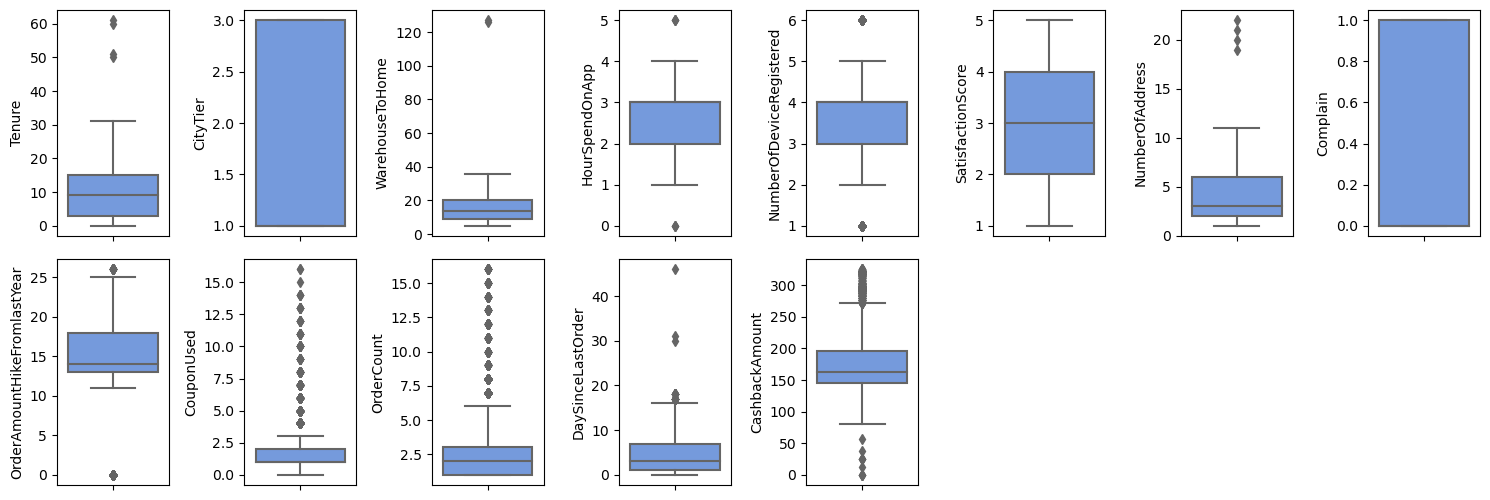

In [11]:
# To check the outliers in the data
df_num = df.select_dtypes(include='number')
features = df_num.columns.drop(['Churn', 'CustomerID'])
plt.figure(figsize=(15,20))
for i in range(0, len(features)):
  plt.subplot(8, 8, i+1)
  sns.boxplot(y=df_num[features[i]], color='cornflowerblue', orient='v')
  plt.tight_layout()
plt.savefig('outlier_plot.png')

In [12]:
df['CouponUsed'].value_counts()

1.0     2105
0.0     1286
2.0     1283
3.0      327
4.0      197
5.0      129
6.0      108
7.0       89
8.0       42
10.0      14
9.0       13
11.0      12
12.0       9
13.0       8
14.0       5
16.0       2
15.0       1
Name: CouponUsed, dtype: int64

In [13]:
from scipy import stats
print(f'Number of rows before filtering outliers : {len(df)}')

df_cleaned = np.array ([True] * len(df))

for col in ['Tenure', 'WarehouseToHome', 'CouponUsed', 'DaySinceLastOrder', 'CashbackAmount']:
  zscore = abs(stats.zscore(df[col]))
  df_cleaned = (zscore < 3)

df_cleaned= df[df_cleaned]
print(f'Number of rows after filtering outliers : {len(df_cleaned)}')

Number of rows before filtering outliers : 5630
Number of rows after filtering outliers : 5617


In [14]:
# Churners vs Non-Churn
df_cleaned['Churn'].value_counts()

0    4669
1     948
Name: Churn, dtype: int64

In [15]:
#Mobile phone and phone are both same and merged those columns
df_cleaned.loc[df_cleaned['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df_cleaned.loc[df_cleaned['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'
#cod is also cash on delievery so merged those two
df_cleaned.loc[df_cleaned['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'  
#cc is also credit card and merged those two
df_cleaned.loc[df_cleaned['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'
# Customer ID has no significance so dropping  'CustomerID' column 
#df_cleaned.drop('CustomerID', axis=1, inplace=True)

In [16]:
df_cleaned['PreferredLoginDevice'].value_counts()

Mobile Phone    3989
Computer        1628
Name: PreferredLoginDevice, dtype: int64

In [17]:
df_cleaned['PreferedOrderCat'].value_counts()

Mobile Phone          2078
Laptop & Accessory    2045
Fashion                826
Grocery                408
Others                 260
Name: PreferedOrderCat, dtype: int64

In [18]:
df_cleaned['PreferredPaymentMode'].value_counts()

Debit Card          2310
Credit Card         1767
E wallet             612
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

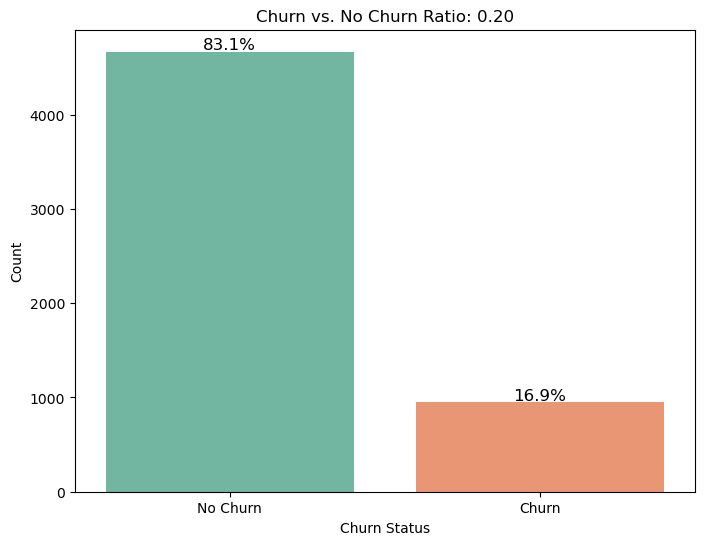

In [19]:
# Calculate churn counts
churn_counts = df_cleaned['Churn'].value_counts()

# Define custom colors for Churn and No Churn
#custom_colors = ["#00FFFF", "#5F9EA0"]  # Use any color codes you prefer

# Create a bar plot with custom colors
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=['No Churn', 'Churn'], y=[churn_counts[0], churn_counts[1]], palette='Set2')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title(f'Churn vs. No Churn Ratio: {churn_counts[1] / churn_counts[0]:.2f}')

# Add percentage values inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height() / len(df_cleaned) * 100:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.savefig('img1.jpg')
plt.show()


<Figure size 640x480 with 0 Axes>

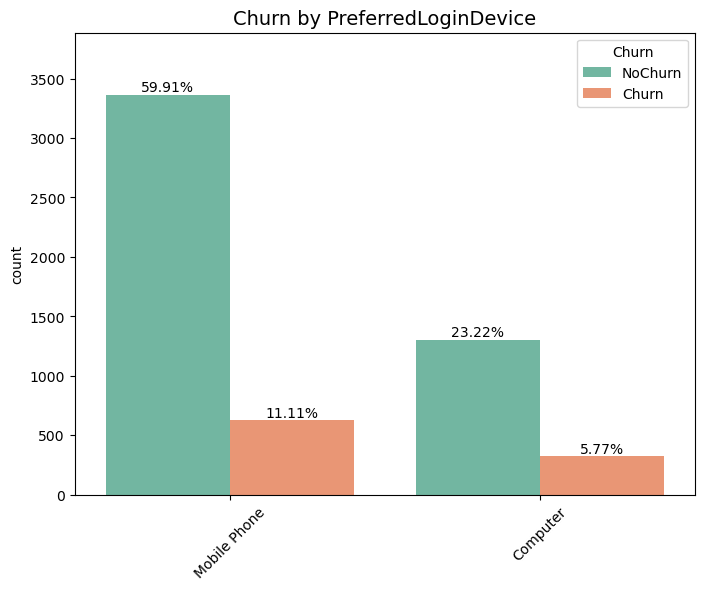

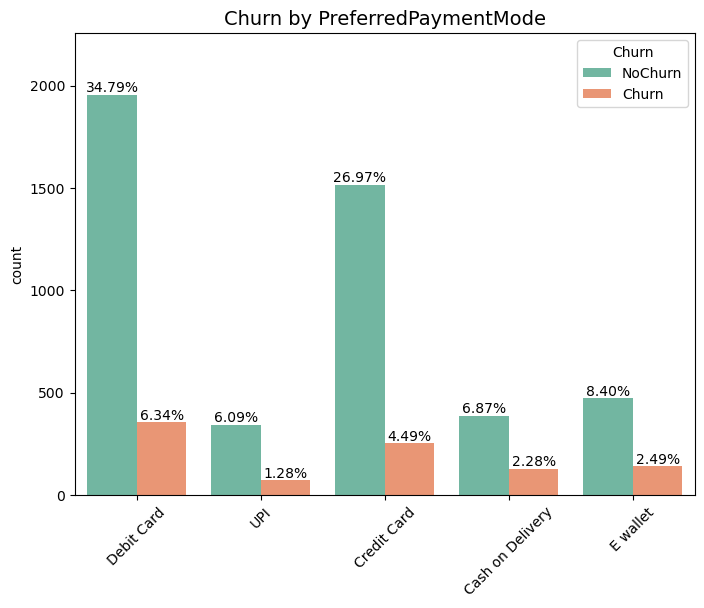

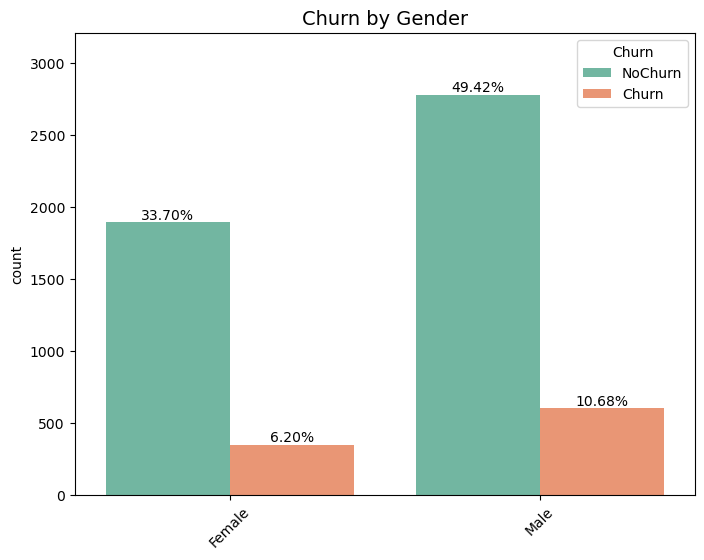

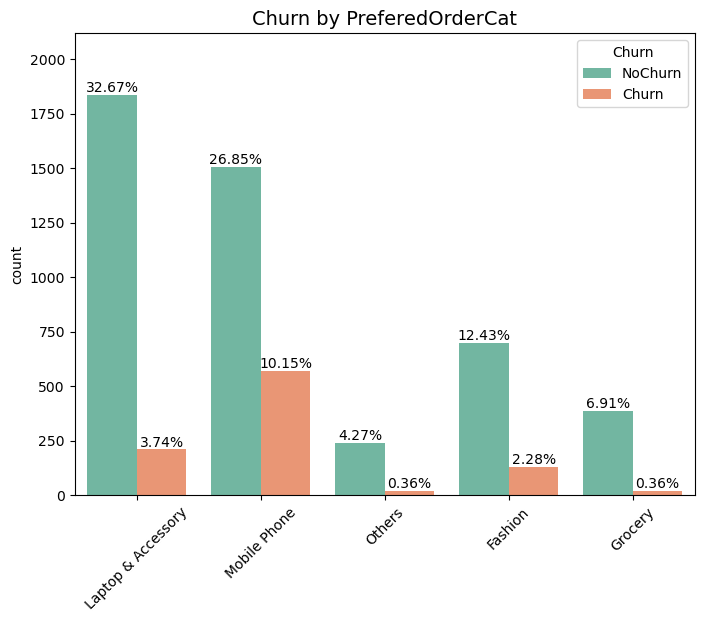

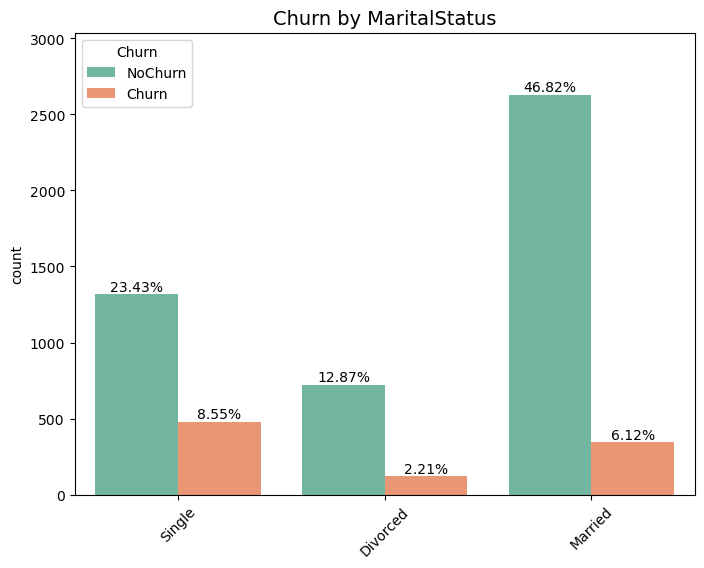

In [20]:
# Create subplots with 2 rows and 3 columns
#fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.6, hspace=0.6)  # Increase the spacing
cols = df_cleaned.select_dtypes(include='object')
# Iterate through the object-type columns
for i, col in enumerate(cols):
    # Create a new figure for each subplot
    plt.figure(figsize=(8, 6))  # Increase the figure size for better visibility
    
    subplot = sns.countplot(x=col, hue='Churn', data=df_cleaned, palette='Set2')
    
    # Customize subplot labels
    #subplot.set_ylabel("Percentage (%)")  # Set y-axis label to percentage
    subplot.set_title(f"Churn by {col}", fontsize=14)  # Set subplot title
    subplot.legend(title="Churn", labels=["NoChurn", "Churn"])  # Set legend labels
    
    # Rotate x-axis labels for better readability if needed
    subplot.tick_params(axis='x', rotation=45)
    
    # Set x-axis label below the plot and adjust label font size
    subplot.set_xlabel("", fontsize=12)  # Clear the default x-axis label
    
    # Calculate and annotate bars with percentage values
    total_height = len(df_cleaned)
    for p in subplot.patches:
        percentage = (p.get_height() / total_height) * 100
        subplot.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')
    
    # Increase the upper ylim to prevent overlap with the top bar label
    subplot.set_ylim(0, subplot.get_ylim()[1] * 1.1)  # Adjust the factor (1.1) as needed
    
    # Generate a filename for the subplot and save it
    subplot_filename = f'subplot_{i}.jpg'
    plt.savefig(subplot_filename, bbox_inches='tight')  # Use bbox_inches='tight' to include labels
    plt.show()



## What is the ratio of the customer's gender and churn?

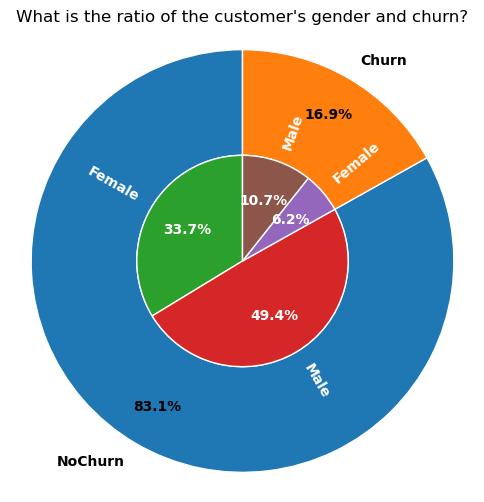

In [21]:
fig, axes2 = plt.subplots(figsize=(6,6))

# Pie chart of churn percentage
width = 0.5

# Percentage of Churned vs Retained
data = df_cleaned.Churn.value_counts().sort_index()
axes2.pie(
    data,
    labels=['NoChurn', 'Churn'],
    autopct='%1.1f%%',
    pctdistance=0.8,
    startangle=90,
    textprops={'color':'black', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1,
)

# Percentage of Gender based on Churn
data = df_cleaned.groupby(["Churn", "Gender"]).size().reset_index()
axes2.pie(
    data.iloc[:,2], 
    labels=list(data.Gender),
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color':'white', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1-width,
    rotatelabels=True,
)

axes2.set_title('What is the ratio of the customer\'s gender and churn?')
#axes2.legend(loc='best', bbox_to_anchor=(1,1))
axes2.axis('equal')

plt.show()

## How the distribution of cashback amounts differs between customers who churn and those who do not? 

In [22]:
dfCA = df_cleaned.copy()
quantile_04 = dfCA['CashbackAmount'].quantile(0.4)
quantile_06 = dfCA['CashbackAmount'].quantile(0.6)
print(quantile_04)
print(quantile_06)

154.0
173.0


In [23]:
# Calculate the quantiles
quantile_04 = dfCA['CashbackAmount'].quantile(0.4)
quantile_06 = dfCA['CashbackAmount'].quantile(0.6)

# Create a new column 'CashbackAmountGroup' based on quantiles
dfCA['CashbackAmountGroup'] = pd.cut(dfCA['CashbackAmount'], 
                                     bins=[0, quantile_04, quantile_06, float('inf')],
                                     labels=['Low', 'Medium', 'High'])


<Figure size 1000x600 with 0 Axes>

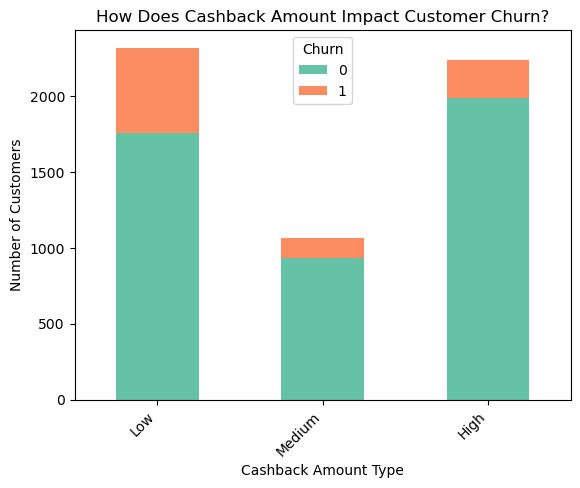

In [24]:
# Define the color palette (Set2)
colors = sns.color_palette("Set2")

DLO_CA = pd.crosstab(dfCA["CashbackAmountGroup"], dfCA["Churn"])

# Create a bar plot with adjusted figure size
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot the data with x-axis label rotation
ax = DLO_CA.plot(kind='bar', stacked=True, title="How Does Cashback Amount Impact Customer Churn?", color=colors)
plt.xlabel('Cashback Amount Type')
plt.ylabel('Number of Customers')

# Rotate the x-axis labels for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Save the plot as an image
plt.savefig('cshbck.png', bbox_inches='tight')  # Use 'bbox_inches' to ensure all elements are saved

# Display the plot (optional)
plt.show()


### What is the Distribution of customers among various city tiers?

In [25]:
df_cleaned['CityTier'].value_counts()

1    3659
3    1716
2     242
Name: CityTier, dtype: int64

In [26]:
# Create a copy of the DataFrame for visualization
df_plot = df_cleaned.copy()

# Create a mapping from the existing city tier values to labels
city_tier_mapping = {1: 'City', 2: 'Village', 3: 'Town'}

# Create a new column "CityTierLabel" in the copy based on the mapping
df_plot['CityTierLabel'] = df_plot['CityTier'].map(city_tier_mapping)

# Verify the new column
print(df_plot['CityTierLabel'].head())


0    Town
1    City
2    City
3    Town
4    City
Name: CityTierLabel, dtype: object


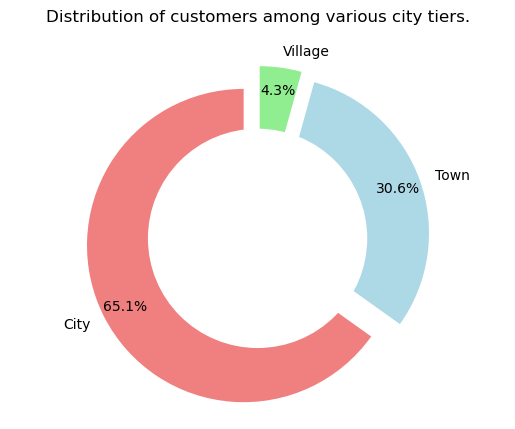

In [27]:
# Count the number of data points in each CityTierLabel category
count_data = df_plot['CityTierLabel'].value_counts()

# Data for the donut plot
labels = count_data.index
sizes = count_data.values
colors = ['lightcoral', 'lightblue', 'lightgreen']  # Colors for each category
explode = (0.1, 0.1, 0.1)  # Explode slices (separate a slice from the center)

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

# Draw a white circle at the center to create the donut hole
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add a title with a gap after it
plt.title('Distribution of customers among various city tiers.', pad=20) 

# Save the plot to a file (e.g., PNG format)
plt.savefig('donut_plot.png', bbox_inches='tight') 
# Show the plot
plt.show()


## Do customers who submit complaints have a higher churn rate compared to those who do not submit complaints?"

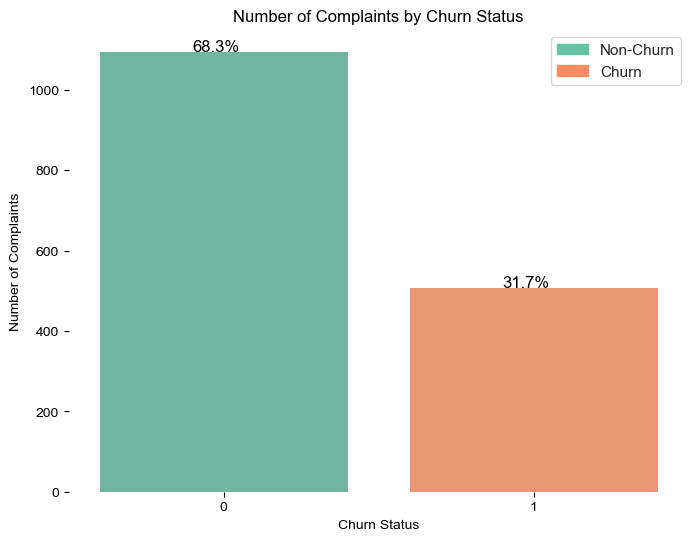

In [28]:
# Assuming you have a DataFrame with 'Complain' and 'Churn' columns
# Replace 'df_cleaned' with your actual DataFrame

# Group the data by 'Churn' and calculate the sum of complaints in each group
complaint_counts = df_cleaned.groupby('Churn')['Complain'].sum().reset_index()

# Create a bar plot with Set2 palette
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Churn', y='Complain', data=complaint_counts, palette='Set2')

# Add labels and a title
plt.xlabel('Churn Status')
plt.ylabel('Number of Complaints')
plt.title('Number of Complaints by Churn Status')

# Add percentage values inside the bars
total_complaints = complaint_counts['Complain'].sum()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_complaints)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 0.5
    ax.annotate(percentage, (x, y), fontsize=12)
# Set the Seaborn theme
sns.set_theme(style="white")
sns.despine(left=True, bottom=True)
# Extract colors from the Set2 palette
palette = sns.color_palette('Set2')
legend_colors = [palette[0], palette[1]]  # Assuming the first color is for 'Churn' and the second for 'Non-Churn'

# Create custom legend labels and handles
legend_labels = ['Non-Churn', 'Churn']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=legend_colors[0]), plt.Rectangle((0, 0), 1, 1, color=legend_colors[1])]

# Add the legend with custom labels and handles
plt.legend(legend_handles, legend_labels)

# Show the plot
plt.show()


## What is the distribution of satisfaction score for order?

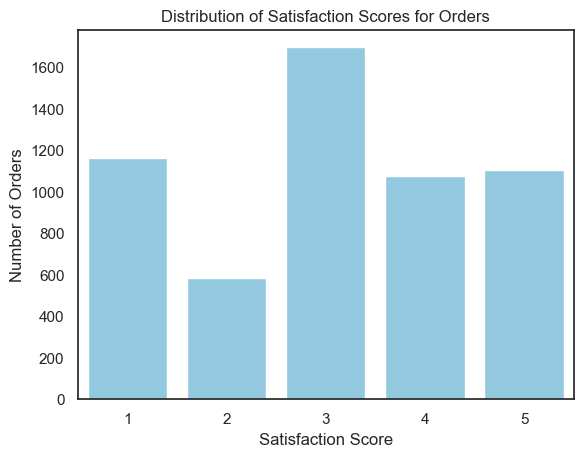

In [29]:
# Group by column B and count occurrences of column A

count_df = df_cleaned['SatisfactionScore'].value_counts().sort_index()

# Plot the distribution using Seaborn

sns.barplot(x=count_df.index, y=count_df.values, color='skyblue')

plt.xlabel('Satisfaction Score')

plt.ylabel('Number of Orders')

plt.title('Distribution of Satisfaction Scores for Orders')

plt.show()

## What is the Day Since Last Order frequency of Customer?

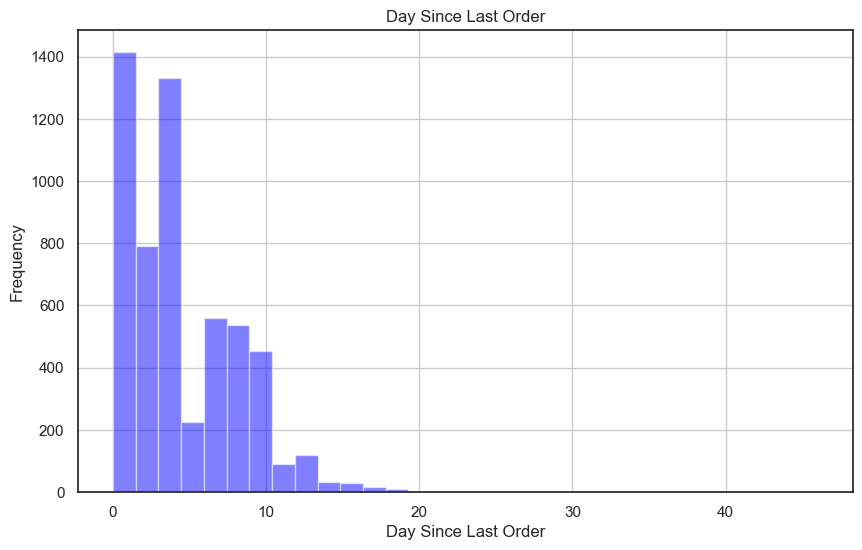

In [31]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_cleaned' with the column 'DaySinceLastOrder'
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['DaySinceLastOrder'], bins=31, alpha=0.5, color='blue')
plt.xlabel('Day Since Last Order')
plt.ylabel('Frequency')
plt.title('Day Since Last Order')
plt.grid(True)
plt.savefig('day.png')
plt.show()



# Data Pre-Processing

In [32]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_cleaned.copy()  # Create a copy of the DataFrame

enc = LabelEncoder()
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = enc.fit_transform(df_encoded[col])

# Now 'df_cleaned_copy' contains the transformed data without generating the warning


In [33]:
#Calling function get more info on missing percentage after removing missing data
data_info(df_encoded)

,data type,percent missing,No. unique,unique values
PreferredLoginDevice,int32,0.0,2,"[1, 0]"
MaritalStatus,int32,0.0,3,"[2, 0, 1]"
PreferredPaymentMode,int32,0.0,5,"[2, 4, 1, 0, 3]"
Gender,int32,0.0,2,"[0, 1]"
PreferedOrderCat,int32,0.0,5,"[2, 3, 4, 0, 1]"
CustomerID,int64,0.0,5617,"[50001, 50002, 50003, 50004, 50005, 50006, 500..."
Complain,int64,0.0,2,"[1, 0]"
NumberOfAddress,int64,0.0,15,"[9, 7, 6, 8, 3, 2, 4, 10, 1, 5, 19, 21, 11, 20..."
SatisfactionScore,int64,0.0,5,"[2, 3, 5, 4, 1]"
NumberOfDeviceRegistered,int64,0.0,6,"[3, 4, 5, 2, 1, 6]"


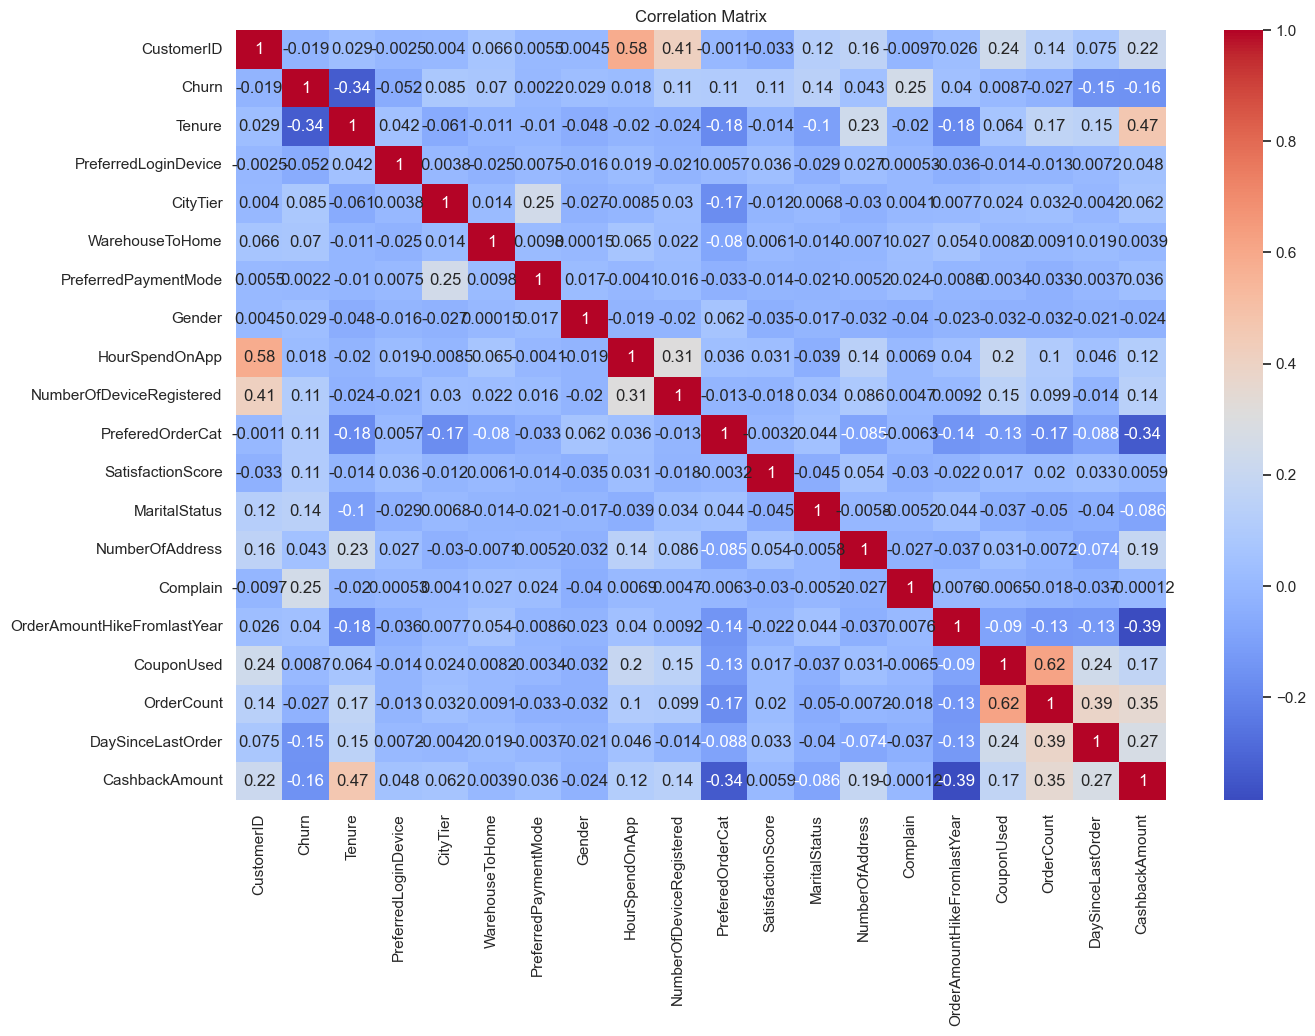

In [34]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize = (15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

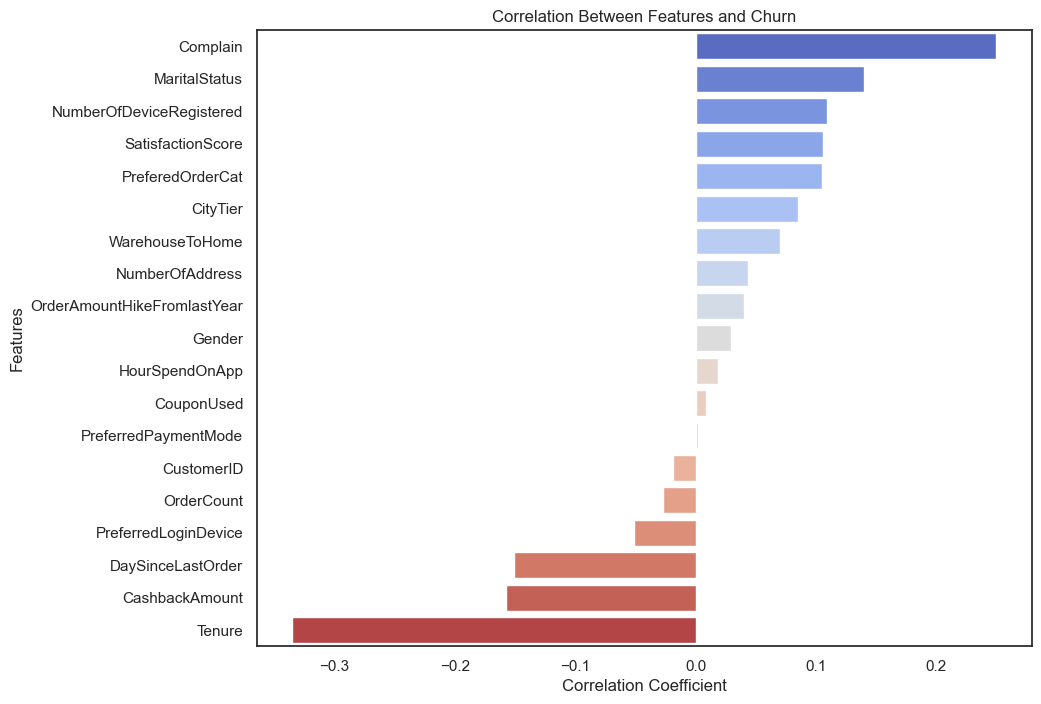

In [35]:
#Correlations of features with respect to churn
churn_corr =  df_encoded.corr()['Churn'].drop('Churn')  # Exclude 'churn' itself from the correlation matrix
# Sort the correlations in descending order
churn_corr = churn_corr.sort_values(ascending=False)
# Create a bar plot to visualize the correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=churn_corr, y=churn_corr.index, palette='coolwarm')
plt.title('Correlation Between Features and Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

# Machine Learning Model

In [36]:
y =df_encoded['Churn']
X = df_encoded.drop(['Churn', 'CustomerID'], axis=1)

## Logistic Regression

In [37]:
# Assuming X is a DataFrame with feature names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Create a LogisticRegression model with fit_intercept=True
clf1 = LogisticRegression(random_state=0, max_iter=1000, fit_intercept=True).fit(X_train, y_train)

# Make predictions
y_pred = clf1.predict(X_test)
print(' Accuracy : {:.2f}%'. format(clf1.score(X_test,y_test) * 100))

 Accuracy : 88.08%


In [38]:
# clf report for test
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       939
           1       0.76      0.41      0.53       185

    accuracy                           0.88      1124
   macro avg       0.83      0.69      0.73      1124
weighted avg       0.87      0.88      0.87      1124



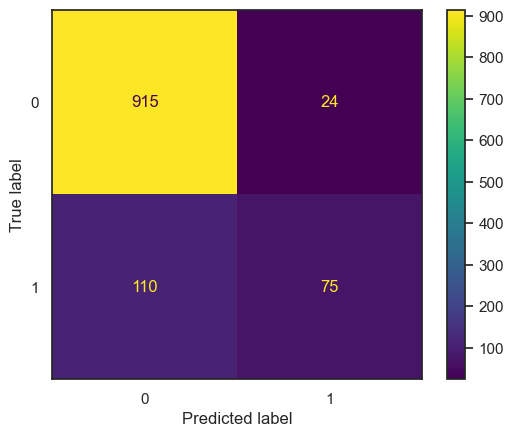

In [39]:
cm = confusion_matrix(y_test, y_pred, labels=clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=clf1.classes_)
disp.plot()
plt.show()

## Decision Tree Classification

In [40]:
clf2= DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)
y_pred1 = clf2.predict(X_test)
print(' Accuracy : {:.2f}%'. format(clf2.score(X_test,y_test) * 100))

 Accuracy : 96.26%


In [41]:
# clf report for test
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       939
           1       0.90      0.88      0.89       185

    accuracy                           0.96      1124
   macro avg       0.94      0.93      0.93      1124
weighted avg       0.96      0.96      0.96      1124



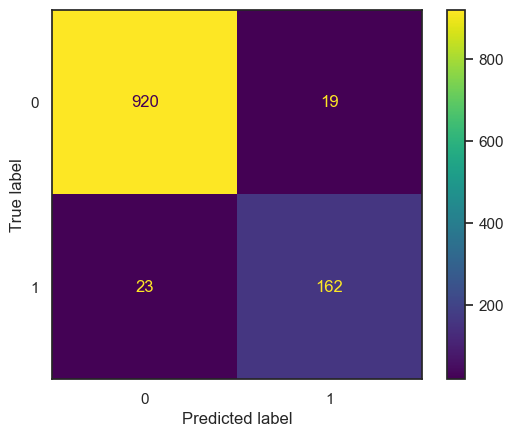

In [42]:
cm2 = confusion_matrix(y_test, y_pred1, labels=clf2.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
display_labels=clf2.classes_)
disp2.plot()
plt.show()

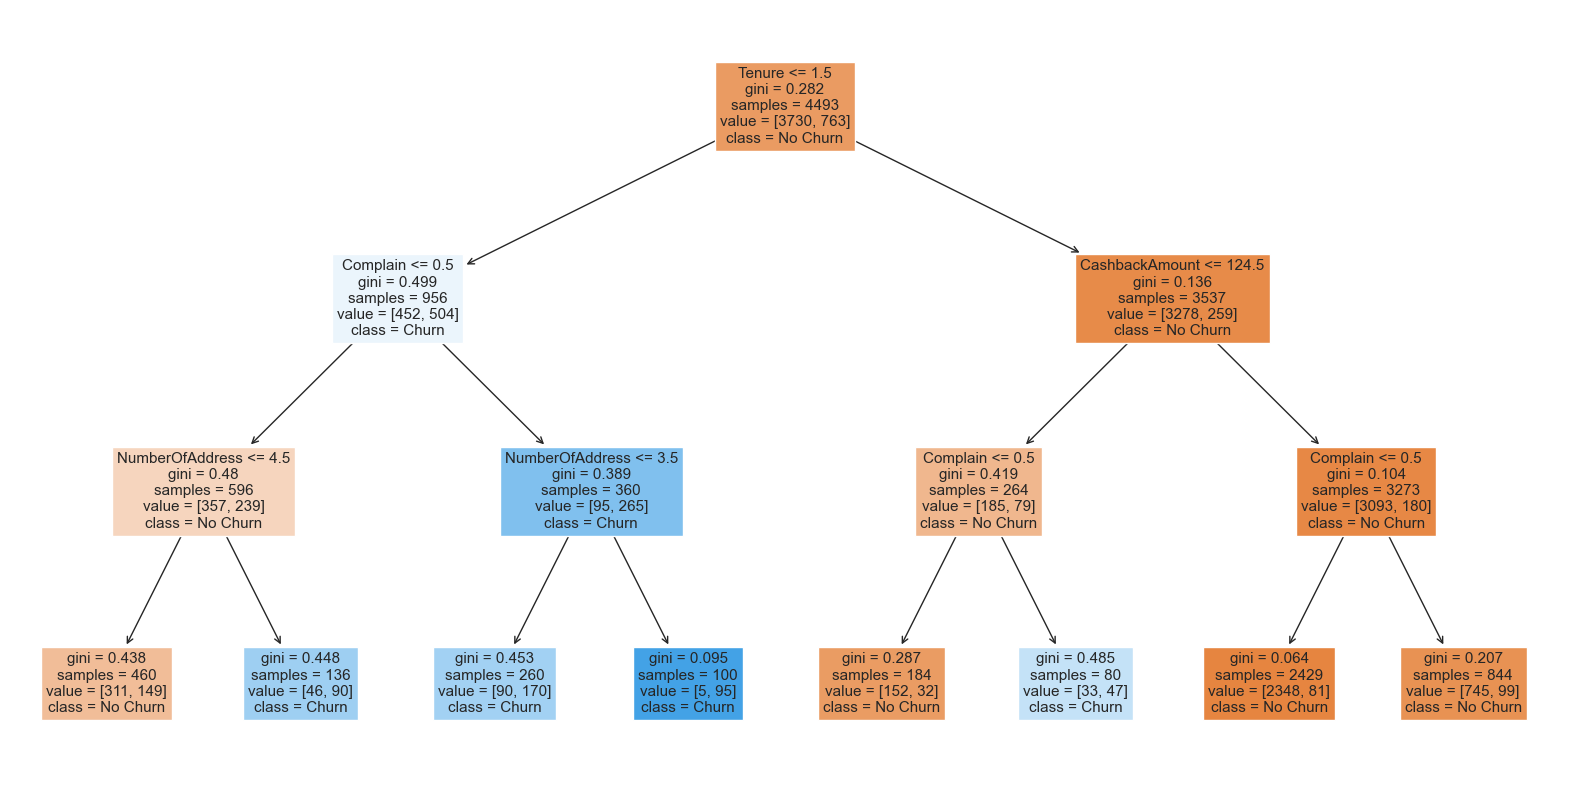

In [43]:
# Create a Decision Tree Classifier with a maximum depth of 3 (you can adjust this value)
clf2 = DecisionTreeClassifier(max_depth=3)

# Fit the classifier to your data
clf2.fit(X_train, y_train)

# Plot the decision tree with a limited depth
plt.figure(figsize=(20, 10))
plot_tree(clf2, filled=True, feature_names=X_train.columns, class_names=['No Churn', 'Churn'])
plt.show()


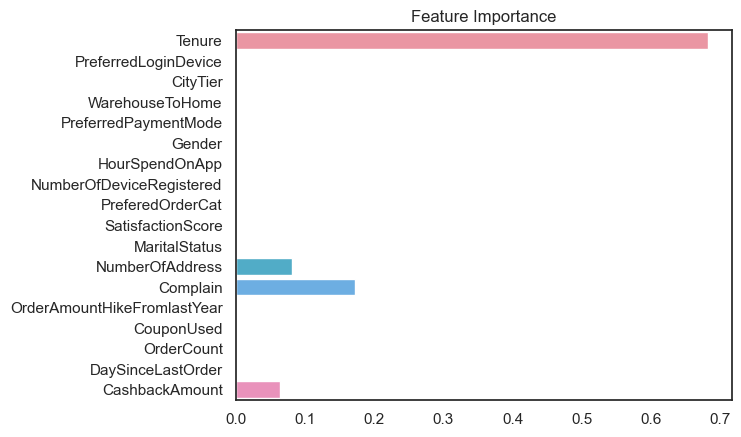

In [44]:
feature_importance = clf2.feature_importances_  
feature_names = X.columns  
sns.barplot(x=feature_importance, y=feature_names)
plt.title("Feature Importance")
plt.show()